In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
#load up the data
movieData = pd.read_csv('movieData_No_Budget.csv', index_col=False)

#rename index
# Rename index
movieData = movieData.set_index('Unnamed: 0')
movieData = movieData.rename_axis('index')

#remove genres
movieData.drop(movieData.index[movieData['genres'] == 0], inplace = True)

movieData.head(5)

,Movie,ID,Release date,popularity,genres,Vote Average,Vote Count,Original Language
index,,,,,,,,
0,The Irishman,398978,2019-11-01,25.287,"[80, 18, 36]",7.6,5490,en
1,David Attenborough: A Life on Our Planet,664280,2020-09-28,12.370,[99],8.5,231,en
2,Roma,426426,2018-08-25,14.424,[18],7.7,3431,es
3,To All the Boys I've Loved Before,466282,2018-08-16,74.988,"[35, 10749]",7.7,7636,en
4,The Social Dilemma,656690,2020-01-26,15.102,"[99, 18]",7.5,1251,en


In [3]:
genreCode = [('Action', 28) , ('Adventure' , 12), ('Animation' , 16), ('Comedy' , 35), ('Crime' , 80), ('Documentary' , 99), 
            ('Drama' , 18),('Family' , 10751),('Fantasy' , 14),('History' , 36),('Horror' , 27),('Music' , 10402),
            ('Mystery' , 9648),('Romance' , 10749),('Science Fiction' , 878),('TV Movie' , 10770),('Thriller' , 53),('War' , 10752),
            ('Western' , 37)]

genreCode

[('Action', 28),
 ('Adventure', 12),
 ('Animation', 16),
 ('Comedy', 35),
 ('Crime', 80),
 ('Documentary', 99),
 ('Drama', 18),
 ('Family', 10751),
 ('Fantasy', 14),
 ('History', 36),
 ('Horror', 27),
 ('Music', 10402),
 ('Mystery', 9648),
 ('Romance', 10749),
 ('Science Fiction', 878),
 ('TV Movie', 10770),
 ('Thriller', 53),
 ('War', 10752),
 ('Western', 37)]

In [4]:
#convert all the numbers in the genre data frame into strings
genreList = movieData['genres']
genreList_corret = []
genreListFix = []



for item in genreList:
    temp_item = item.replace(' ','')
    if not temp_item == '[]':
        genreList_corret.append(item.replace('[','').replace(']', '').split(','))

for row in genreList_corret:
    for num in row:
        temp_num = int(num)
        for ele in genreCode:
            if temp_num == ele[1]:
                genreListFix.append(ele[0])
                
genreList_corret

[['80', ' 18', ' 36'],
 ['99'],
 ['18'],
 ['35', ' 10749'],
 ['99', ' 18'],
 ['12', ' 18', ' 878', ' 14'],
 ['37', ' 35', ' 18'],
 ['18', ' 36'],
 ['18', ' 80'],
 ['18', ' 35', ' 36'],
 ['18'],
 ['99', ' 10770'],
 ['99', ' 10402'],
 ['99', ' 10752'],
 ['18', ' 36', ' 10752'],
 ['35'],
 ['878', ' 53'],
 ['99', ' 18', ' 9648'],
 ['99'],
 ['18', ' 37'],
 ['35', ' 10749', ' 18'],
 ['18', ' 36', ' 10751'],
 ['80', ' 18', ' 53'],
 ['35', ' 18'],
 ['18'],
 ['27', ' 53'],
 ['10749', ' 35'],
 ['35'],
 ['99'],
 ['99'],
 ['18', ' 28', ' 53'],
 ['18', ' 27', ' 53'],
 ['10749', ' 18', ' 36'],
 ['99'],
 ['28', ' 53', ' 80'],
 ['35', ' 18'],
 ['99'],
 ['53', ' 18', ' 878'],
 ['35', ' 16', ' 10751'],
 ['878', ' 53', ' 18', ' 9648', ' 28'],
 ['35'],
 ['99', ' 10752'],
 ['10751', ' 16', ' 35', ' 878', ' 10770'],
 ['99'],
 ['35', ' 18'],
 ['18', ' 9648', ' 37'],
 ['18', ' 28'],
 ['35', ' 10402'],
 ['27', ' 53', ' 18'],
 ['35'],
 ['35', ' 12', ' 10751', ' 14'],
 ['18', ' 10402'],
 ['27', ' 53'],
 ['18', '

In [5]:
counts = pd.Series(genreListFix).value_counts()
counts

Drama              976
Comedy             872
Thriller           524
Action             377
Documentary        351
Romance            312
Family             308
Adventure          247
Horror             241
Crime              223
Science Fiction    187
Animation          186
Fantasy            181
Mystery            143
TV Movie           142
Music              125
History            106
War                 58
Western             29
dtype: int64

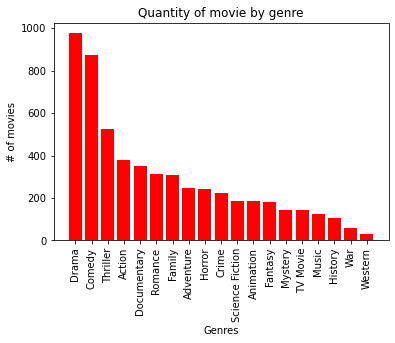

In [6]:
xAxis = np.arange(len(counts))
tick_locations = [value for value in xAxis]

theGenres = list(counts.keys())
theValues = counts
plt.bar(theGenres,theValues,color="red")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("# of movies")
plt.title("Quantity of movie by genre")

plt.savefig("Images/GenreBarPlot.png")

plt.show()